In [23]:
import pandas as pd
import numpy as np 

In [24]:
train = pd.read_csv("thyroid.csv")

In [25]:
train.head()

,CLASS,T3RESIN,THYROXIN,THYRONINE,THYROID,TSH_VALUE
0,1,107,10.1,2.2,0.9,2.7
1,1,113,9.9,3.1,2.0,5.9
2,1,127,12.9,2.4,1.4,0.6
3,1,109,5.3,1.6,1.4,1.5
4,1,105,7.3,1.5,1.5,-0.1


In [26]:
train.isna().sum()

CLASS        0
T3RESIN      0
THYROXIN     0
THYRONINE    0
THYROID      0
TSH_VALUE    0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


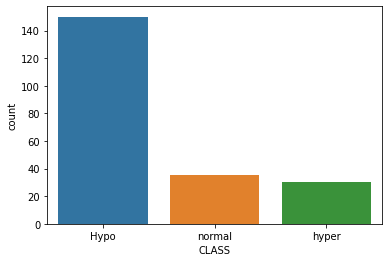

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
g = sns.countplot(train['CLASS'])
g.set_xticklabels(['Hypo','normal',"hyper"])
plt.show()

In [28]:
X = train.iloc[:, 1:]
y= train.iloc[:, 0]

In [32]:
y= pd.DataFrame(y, columns= ["CLASS"])

In [34]:
from imblearn.over_sampling import SMOTE
print("Before UpSampling, counts of label '1': {}".format(sum(y.CLASS==1)))
print("Before UpSampling, counts of label '2': {} \n".format(sum(y.CLASS==2)))
print("Before UpSampling, counts of label '3': {} \n".format(sum(y.CLASS==3)))

sm = SMOTE(k_neighbors = 5, random_state=1)   
X_smote, y = sm.fit_sample(X, y)

print("After UpSampling, counts of label '1': {}".format(sum(y==1)))
print("After UpSampling, counts of label '2': {} \n".format(sum(y==2)))
print("After UpSampling, counts of label '3': {} \n".format(sum(y==3)))

Before UpSampling, counts of label '1': 150
Before UpSampling, counts of label '2': 35 

Before UpSampling, counts of label '3': 30 

After UpSampling, counts of label '1': 150
After UpSampling, counts of label '2': 150 

After UpSampling, counts of label '3': 150 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y, test_size = 0.3, random_state = 25)

In [38]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [39]:
import xgboost as xgb
model= xgb.XGBClassifier(learning_rate=0.1419990968922539, max_depth=5,n_estimators=2000,gamma=0.1,colsample_bytree=0.5,min_child_weight=7)
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.1,
              learning_rate=0.1419990968922539, max_delta_step=0, max_depth=5,
              min_child_weight=7, missing=None, n_estimators=2000, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [40]:
y_pred = model.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9703703703703703

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred, labels = [1,2,3]))

              precision    recall  f1-score   support

           1       0.91      1.00      0.95        42
           2       1.00      0.96      0.98        45
           3       1.00      0.96      0.98        48

    accuracy                           0.97       135
   macro avg       0.97      0.97      0.97       135
weighted avg       0.97      0.97      0.97       135

